In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('mode.chained_assignment', None)

ticker = "GOOGL"
df = yf.download(ticker, start="2021-01-02", end="2022-10-26")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,88.000000,88.124496,85.357002,86.306503,86.306503,37324000
2021-01-05,86.254501,87.341499,85.845001,87.002502,87.002502,20360000
2021-01-06,85.013000,87.198502,84.805000,86.143997,86.143997,46588000
2021-01-07,86.337997,88.890999,86.337997,88.717003,88.717003,41936000
2021-01-08,88.858002,89.968002,88.060997,89.891502,89.891502,35484000


In [2]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2021-03-16,103.299500,105.683998,102.964500,104.194504,104.194504,31900000,102.576651,97.95688
2021-03-17,103.423500,104.949997,102.206001,104.111000,104.111000,26382000,102.930701,98.31297
2021-03-18,102.408997,103.437500,100.959000,101.067001,101.067001,31700000,102.867751,98.59426
2021-03-19,101.486504,101.851997,100.146500,101.348000,101.348000,46072000,102.517200,98.89834
2021-03-22,101.381500,102.417000,100.699997,101.534500,101.534500,33536000,102.633150,99.15469


In [3]:
conditions = [df['MA10'] > df['MA50'], 
              df['MA10'] < df['MA50']]

#define choices
choices = [1, 0]

#create new column in DataFrame that displays results of comparisons
df['Position']= np.select(conditions, choices)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Position
Date,,,,,,,,,
2021-03-16,103.299500,105.683998,102.964500,104.194504,104.194504,31900000,102.576651,97.95688,1
2021-03-17,103.423500,104.949997,102.206001,104.111000,104.111000,26382000,102.930701,98.31297,1
2021-03-18,102.408997,103.437500,100.959000,101.067001,101.067001,31700000,102.867751,98.59426,1
2021-03-19,101.486504,101.851997,100.146500,101.348000,101.348000,46072000,102.517200,98.89834,1
2021-03-22,101.381500,102.417000,100.699997,101.534500,101.534500,33536000,102.633150,99.15469,1


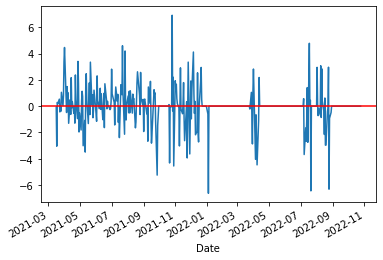

In [4]:
df['Close_Next'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[i, 'Close_Next'] - df.loc[i, 'Close'] if df.loc[i, 'Position']==1 else 0 for i in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')

<AxesSubplot:xlabel='Date'>

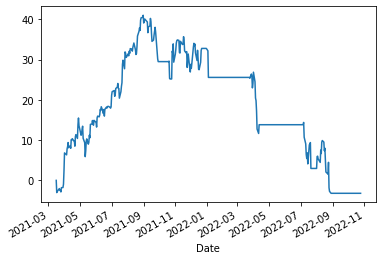

In [5]:
df['Cum_Profit'] = df['Profit'].cumsum()
df['Cum_Profit'].plot()